In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

# PlantGrowth

In [3]:
data = pd.read_csv('PlantGrowth.csv')
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


### Box plot (Ящик с усами, диаграмма размаха)

график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Границами ящика служат первый и третий квартили (0.25 и 0.75 квантили соответственно), линия в середине ящика — медиана. Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами (см. Википедию https://ru.wikipedia.org/wiki/Ящик_с_усами). 

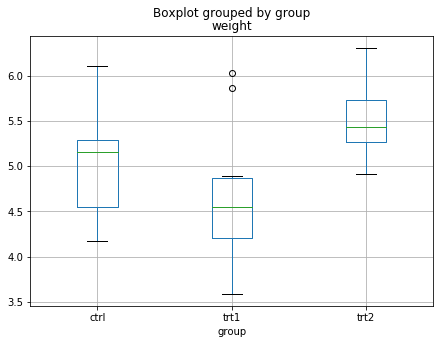

In [3]:
data.boxplot('weight', by='group', figsize=(7, 5))

### scipy.stats

<a href=https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.f_oneway.html>`f_oneway`</a>`(sample1, sample2, ...): statistic, pvalue`

In [4]:
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
sps.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

F_onewayResult(statistic=4.846087862380136, pvalue=0.015909958325622899)

Модельные эксперименты.

1). Средние равны.

In [7]:
samples = []
for i in range(5):
    samples.append(sps.norm.rvs(size=10+i))
sps.f_oneway(*samples)

F_onewayResult(statistic=0.62389241918312388, pvalue=0.64742716422944557)

2). Средние не равны.

In [8]:
samples = []
for i in range(5):
    samples.append(sps.norm(loc=i).rvs(size=10+i))
sps.f_oneway(*samples)

F_onewayResult(statistic=27.201673350784784, pvalue=1.7809750583246406e-12)

### statsmodels

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
mod = ols('weight ~ group', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


**Ноутбук с некоторыми исследованиями:**
http://statsmodels.sourceforge.net/stable/examples/notebooks/generated/interactions_anova.html